In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ip_adapter
!pip install safetensors
!pip install diffusers transformers datasets torch torchvision pillow accelerate
!pip install open_clip_torch
!pip install controlnet_aux
!pip install --upgrade huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipelineLegacy, DDIMScheduler, AutoencoderKL, UniPCMultistepScheduler, UNet2DConditionModel, ControlNetModel, AutoPipelineForText2Image

from PIL import Image
import open_clip
import torch
from PIL import Image
from ip_adapter import IPAdapter
from transformers import CLIPVisionModelWithProjection
from controlnet_aux import OpenposeDetector
from diffusers.image_processor import IPAdapterMaskProcessor
from diffusers.utils import load_image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


In [ ]:
from huggingface_hub import login

with open('/content/drive/MyDrive/BigProject/token.txt', 'r') as f:
    hf_token = f.read().strip()

login(token=hf_token)

In [ ]:
##초기 이미지 생성
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
from huggingface_hub import hf_hub_download

device = "cuda" if torch.cuda.is_available() else "cpu"

# 모델 ID 및 장치 설정
model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
# unet_weights_path = '/content/drive/MyDrive/model_checkpoints/best_model.pth'
unet_weights_path = hf_hub_download(
    repo_id="lee124/sd1.5_fine_tuned",
    filename="best_model.pth"
)

# Stable Diffusion 파이프라인 로드
pipeline = AutoPipelineForText2Image.from_pretrained(
    model_id
)

pipeline.scheduler = UniPCMultistepScheduler.from_config(pipeline.scheduler.config)
pipeline.safety_checker = None  # NSFW 감지 비활성화

#가중치 로드
state_dict = torch.load(unet_weights_path)
pipeline.unet.load_state_dict(state_dict)

pipeline.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


best_model.pth:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<ipython-input-5-6bb8afc046ea>:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(unet_weights_path)


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "UniPCMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
# 캐릭터 생성 함수
def generate_character_images_fixed(prompt, output_dir="generated_characters"):
    # 고정된 설정값
  negative_prompt = '''(worst quality, low quality:1.4),
(bad-artist:1.0),
bad-hands-5,
lowres,
bad anatomy,
((text)),
(watermark),
error,
missing fingers,
extra digit,
fewer digits,
cropped,
blurry,
(extra limbs),
bad-artist-anime,
badhandv4,
EasyNegative,
ng_deepnegative_v1_75t,
verybadimagenegative_v1.3,
BadDream,
(three hands:1.1),
(three legs:1.1),
(more than two hands:1.4),
(more than two legs:1.2),
text,
words,
logo,
overexposed
'''
  guidance_scale = 8.5
  num_inference_steps = 200
  height = 512
  width = 512
  os.makedirs(output_dir, exist_ok=True)  # 결과 저장 디렉토리 생성
  # 이미지 생성
  with torch.no_grad():
      generated_images = pipeline(
          prompt=[prompt] * 4,  # 동일한 프롬프트로 4개의 이미지 생성
          negative_prompt=[negative_prompt] * 4,  # 부정 프롬프트 추가
          num_inference_steps=num_inference_steps,  # 단계 수
          guidance_scale=guidance_scale,  # 텍스트 조건의 강도
          height=height,  # 이미지 높이
          width=width  # 이미지 너비
      ).images

  # 생성된 이미지 출력
  fig, axes = plt.subplots(1, 4, figsize=(16, 4))
  for i, img in enumerate(generated_images):
      axes[i].imshow(img)
      axes[i].axis("off")
  plt.tight_layout()
  plt.show()

  # 사용자로부터 선택 받기
  selected_index = int(input("마음에 드는 이미지를 선택하세요 (0-3): "))
  assert 0 <= selected_index < 4, "0에서 3 사이의 숫자를 입력해주세요."

  # 선택된 이미지 저장
  selected_image = generated_images[selected_index]
  character_name = input("저장할 캐릭터 이름을 입력하세요: ")
  save_path = os.path.join(output_dir, f"{character_name}.png")
  selected_image.save(save_path)

  print(f"선택된 이미지가 {save_path}에 저장되었습니다.")

  return selected_image, character_name

  0%|          | 0/200 [00:00<?, ?it/s]

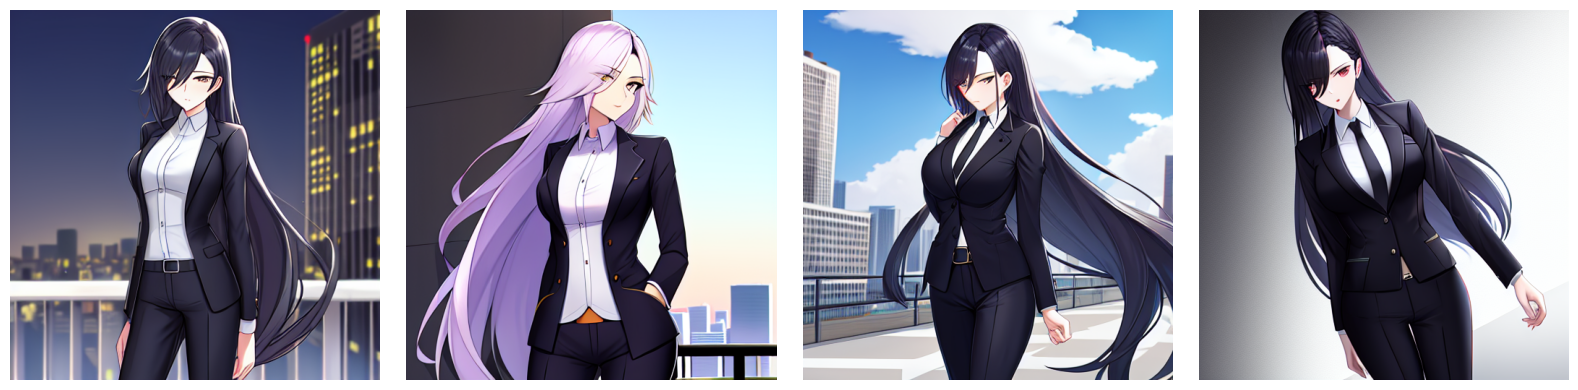

KeyboardInterrupt: Interrupted by user

In [ ]:
generate_character_images_fixed("""Modern city, female, long hair, late 20s, slim physique, suit""")

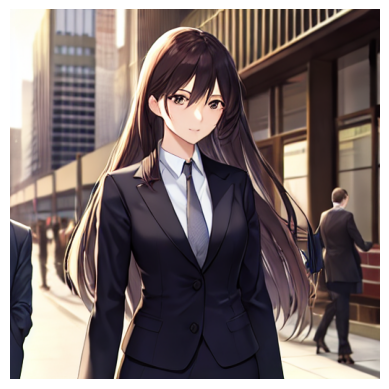

In [ ]:
#경로지정을 통해 다운받은 이미지나 생성된 이미지 둘 중 골라서 불러옴
import matplotlib.pyplot as plt
import numpy as np

# read image prompt
image = Image.open("/content/drive/MyDrive/BigProject/img_exam/지수5.png")
image.show()

plt.imshow(np.array(image))
plt.axis('off')
plt.show()

In [ ]:
#여러 ip어댑터 중 가장 유지가 잘 된 모델 사용

# pipeline.load_ip_adapter("lee124/Ip_Adapter_anyme",
#                          subfolder="models",
#                          weight_name="ipAdapterAnimeFine_v10.safetensors")
pipeline.load_ip_adapter("lee124/Ip_Adapter_anyme_plus",
                         subfolder="models",
                         weight_name="ipAdapterPlusAnime_v10.safetensors")
# pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter-full-face_sd15.safetensors")
# pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter_sd15.safetensors")
# pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter_sd15_light_v11.bin")

ipAdapterPlusAnime_v10.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

models/image_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.53G [00:00<?, ?B/s]

In [ ]:
pipeline.set_ip_adapter_scale(0.5)

  0%|          | 0/150 [00:00<?, ?it/s]

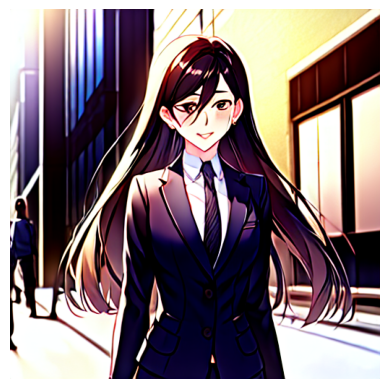

In [ ]:
output = pipeline(
    prompt='''best quality, high quality, 1person, crying''',
    negative_prompt = '''
(worst quality, low quality:1.4),
(bad-artist:1.0),
bad-hands-5,
lowres,
bad anatomy,
((text)),
(watermark),
error,
missing fingers,
extra digit,
fewer digits,
cropped,
blurry,
(extra limbs),
badhandv4,
EasyNegative,
ng_deepnegative_v1_75t,
verybadimagenegative_v1.3,
BadDream,
(three hands:1.1),
(three legs:1.1),
(more than two hands:1.4),
(more than two legs:1.2),
text,
words,
logo,
overexposed
''',
    ip_adapter_image=image,
    num_inference_steps=150,
    height=512,
    width=512,
    guidance_scale=9.5
)
plt.imshow(np.array(output.images[0]))
plt.axis('off')
plt.show()

In [ ]:
############ 캐릭터 2명 넣고 만드는 코드 #########################
from diffusers.image_processor import IPAdapterMaskProcessor
from diffusers.utils import load_image
mask1 = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_mask_mask1.png")
mask2 = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_mask_mask2.png")

output_height = 512
output_width = 512

processor = IPAdapterMaskProcessor()
masks = processor.preprocess([mask1, mask2], height=output_height, width=output_width)
pipeline.set_ip_adapter_scale([[0.5, 0.5]])  # 얼마나 기존 이미지를 따라갈건지 입력 2명이 들어가서 2개입니다.

face_image1 = load_image("/content/drive/MyDrive/BigProject/img_exam/지수5.png")
face_image2 = load_image("/content/drive/MyDrive/BigProject/img_exam/윤_0.png")

ip_images = [[face_image1, face_image2]]

masks = [masks.reshape(1, masks.shape[0], masks.shape[2], masks.shape[3])]
generator = torch.Generator(device="cuda").manual_seed(14)

In [ ]:
neg = '''
FastNegativeV2, (bad-artist:1.0), (worst quality, low quality:1.4), bad anatomy, bad hands,
extra/missing limbs or fingers, (text, logo, watermark), blurry, (revealing or suggestive clothing, nudity, exposed skin : 1.5),
(provocative or unrealistic poses), bad_prompt_version2:0.8, badhandv4, EasyNegative, verybadimagenegative_v1.3, (overexposure : 1.5),
no screen, no monitor, no display, sitting side by side, sitting next to each other
'''

In [ ]:
#시드고정하지 않고 생성
num_images = 4 # 이미지 한번에 몇장 만들건지
generator = torch.Generator(device="cuda").manual_seed(14)
image = pipeline(
    prompt="best quality, high quality, 1 woman is being chased by another woman", # 프롬프트를 입력해주세요
    ip_adapter_image=ip_images,
    negative_prompt=neg,
    num_inference_steps=200,  # 몇번에 거쳐이미지를 만들거냐 보통  50~100 높을수록 퀄리티가 좋아짐 , 생성 속도는 느려짐
    guidance_scale=9.5, # 프롬프트 말을 얼마나 잘 들을거냐 / 보통 7.5~ 8.5 높을 수록 프롬프트를 따라감
    num_images_per_prompt=num_images,
    cross_attention_kwargs={"ip_adapter_masks": masks},
    height = 512,
    width = 512
).images

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
#이미지마다 시드 바꿔가며 생성
num_images = 10
base_seed = 30

images = []

for i in range(num_images):
    generator = torch.Generator(device="cuda").manual_seed(base_seed + i)

    image = pipeline(
        prompt='''best quality, high quality, 1 person, crying''',
        ip_adapter_image=ip_images,
        negative_prompt=neg + "no screen, no monitor, no display, sitting side by side, sitting next to each other, expressionless, keep a distance",
        num_inference_steps=200,
        guidance_scale=10.5,
        num_images_per_prompt=1,
        cross_attention_kwargs={"ip_adapter_masks": masks},
        height=512,
        width=512,
        generator=generator
    ).images[0]

    images.append(image)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

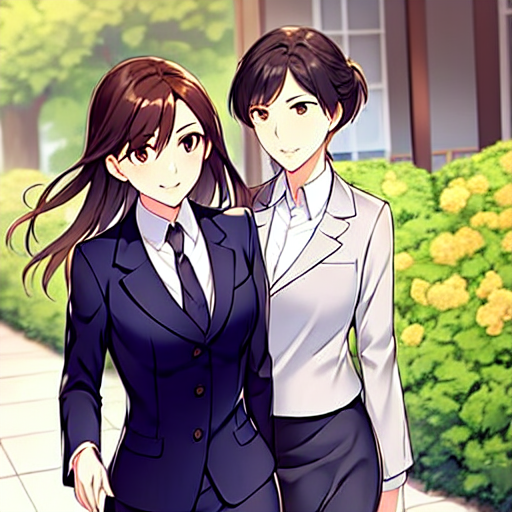

In [ ]:
image[2]

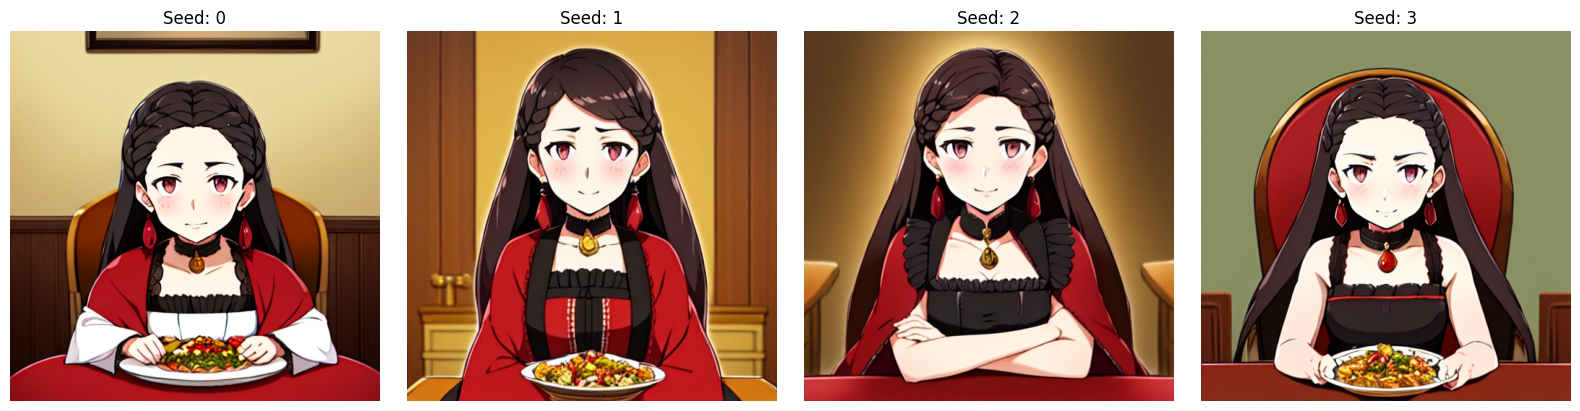

In [ ]:
# 이미지 여러장 만들었을때 한번에 출력
# 14, 32, 36, 37
import matplotlib.pyplot as plt

# 이미지 그리드 생성을 위한 행과 열 계산
rows = 2
cols = 5

# 서브플롯 생성
plt.figure(figsize=(20, 8))

# 각 이미지를 순회하며 출력
for idx, img in enumerate(image):
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img)
    plt.axis('off')  # 축 제거
    plt.title(f'Seed: {idx}')  # 시드값 표시

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
save_path = "/content/drive/MyDrive/BigProject/img_exam/scene15(4).png"
images[9].save(save_path)